train loss:2.043729577188632
=== epoch:1, train acc:0.324, test acc:0.314 ===
train loss:1.8813080799794735
train loss:1.7328015409579596
train loss:1.571520930776041
train loss:1.4462027937400725
train loss:1.262300136681893
train loss:1.302645778271227
train loss:1.088749493440944
train loss:1.0025415638190087
train loss:0.9400524822146928
train loss:0.9241716218483466
train loss:0.7937965315003508
train loss:0.6838525859866632
train loss:0.777496156023454
train loss:0.8362753035275801
train loss:0.6947462990721388
train loss:0.802764030586813
train loss:0.6118822104572321
train loss:0.6390677932393186
train loss:0.7566589078263115
train loss:0.7887221913766832
train loss:0.6722087802370104
train loss:0.6333286472171661
train loss:0.7762232469808176
train loss:0.8571653511769017
train loss:0.6862645825530284
train loss:0.9380611799815657
train loss:0.8063567966311403
train loss:0.6397501349312382
train loss:0.6916836604724995
train loss:0.5799896908636438
train loss:0.565919259492251

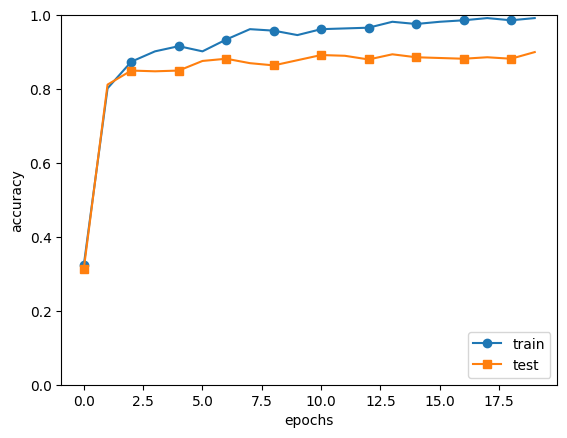

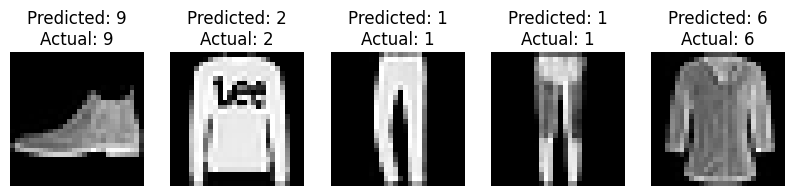

In [62]:
import os
import numpy as np
import matplotlib.pyplot as plt
import gzip
from collections import OrderedDict
from common.trainer import Trainer
from simple_convnet import SimpleConvNet
from common.layers import *
from common.gradient import numerical_gradient

# 로그 파일 설정
log_file = 'accuracy_log3.txt'

if os.path.exists(log_file):
    os.remove(log_file)

with open(log_file, 'a') as f:
    f.write("Fashion MNIST 데이터셋을 로드합니다...\n")
    f.write("test 데이터를 로드했습니다.\n")

# 테스트 데이터셋에서 처음 몇 개의 이미지를 예측하여 출력
num_samples = 5

def load_fashion_mnist(path, kind='train'):
    """`path`에서 Fashion MNIST 데이터셋을 로드합니다."""
    labels_path = os.path.join(path, f'{kind}-labels-idx1-ubyte.gz')
    images_path = os.path.join(path, f'{kind}-images-idx3-ubyte.gz')

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 1, 28, 28)

    with open(log_file, 'a') as f:
        f.write(f"{kind} 데이터를 로드했습니다.\n")

    return images, labels

# 데이터 읽기 (Fashion MNIST)
path = './fashion-mnist'  # Fashion MNIST 데이터 파일들이 저장된 경로

x_train, t_train = load_fashion_mnist(path, kind='train')
x_test, t_test = load_fashion_mnist(path, kind='t10k')

# 데이터 전처리
x_train = x_train.reshape(-1, 1, 28, 28) / 255.0  # 데이터를 CNN에 맞는 형태로 변환 및 정규화
x_test = x_test.reshape(-1, 1, 28, 28) / 255.0

t_train = np.eye(10)[t_train]  # 원-핫 인코딩
t_test = np.eye(10)[t_test]    # 원-핫 인코딩

# 학습 데이터 크기 줄이기 (코드 실행 속도를 빠르게 하기 위해)
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:5000], t_test[:5000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param={'filter_num': 100, 'filter_size': 3, 'pad': 0, 'stride': 1},
                        hidden_size=150, output_size=10, weight_init_std=0.05)

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=500)
trainer.train()


# 훈련 및 테스트 정확도 기록.
train_acc = trainer.train_acc_list[-1]  # 마지막 train accuracy
test_acc = trainer.test_acc_list[-1]    # 마지막 test accuracy
content = f"Epoch {max_epochs}: Train accuracy: {train_acc:.4f}, Test accuracy: {test_acc:.4f}"

# 로그 파일에 기록
with open(log_file, 'a') as f:
    f.write(content + '\n')

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")


# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# 처음 몇 개의 테스트 이미지에 대한 예측 결과 출력
plt.figure(figsize=(10, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {np.argmax(predictions[i])}\nActual: {np.argmax(t_test[i])}')
    plt.axis('off')

plt.show()

